# Programming Assignment: Размещение баннеров

In [68]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Преобразование данных 

In [69]:
!head data/checkins.dat

   id    | user_id | venue_id |     latitude      |     longitude     |     created_at      
---------+---------+----------+-------------------+-------------------+---------------------
  984301 | 2041916 |     5222 |                   |                   | 2012-04-21 17:39:01
  984222 |   15824 |     5222 |        38.8951118 |       -77.0363658 | 2012-04-21 17:43:47
  984315 | 1764391 |     5222 |                   |                   | 2012-04-21 17:37:18
  984234 |   44652 |     5222 |         33.800745 |         -84.41052 | 2012-04-21 17:43:43
  984249 | 2146840 |     5222 |                   |                   | 2012-04-21 17:42:58
  984268 | 2146843 |     5222 |                   |                   | 2012-04-21 17:42:38
  984281 | 2146846 |     5222 |                   |                   | 2012-04-21 17:39:40
  984291 |  105054 |     5222 |        45.5234515 |      -122.6762071 | 2012-04-21 17:39:22


In [70]:
checkins = pd.read_csv("data/checkins.dat", sep="|", skipinitialspace=True, header=0).loc[1:]
checkins.columns = [col.strip() for col in checkins.columns]

In [71]:
data = checkins[checkins.latitude.notnull() & checkins.longitude.notnull()] \
                [["latitude", "longitude"]]

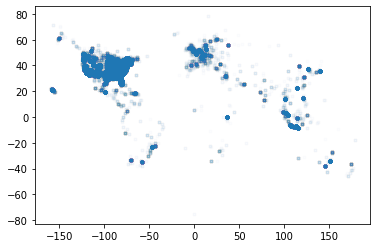

In [53]:
plt.plot(data.longitude, data.latitude, ".", alpha=0.01)

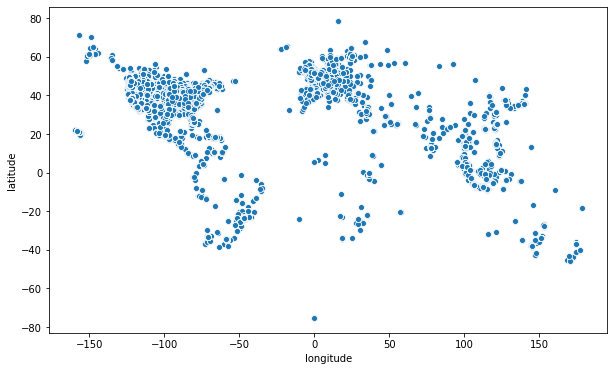

In [72]:
f, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=data.longitude, y=data.latitude)

## Кластеризация 

In [73]:
from sklearn.cluster import MeanShift

In [156]:
X = data.to_numpy()[:10**5]

In [158]:
%%time
ms = MeanShift(bandwidth=0.1).fit(X)
clustering = ms.predict(X)

CPU times: user 2min 13s, sys: 2.05 s, total: 2min 15s
Wall time: 2min 18s


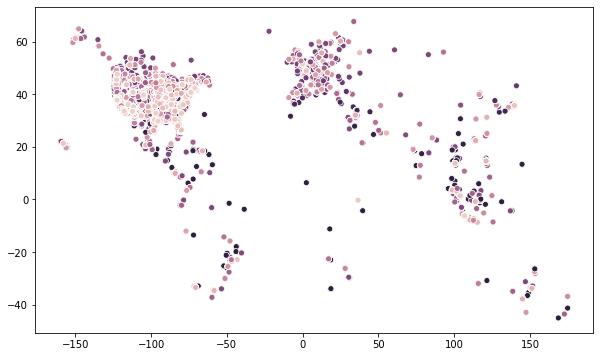

In [162]:
f, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=X[:, 1], y=X[:, 0], hue=clustering, legend=None)

### Удаление небольших кластеров 

In [163]:
data_clusters = data[:10**5]
data_clusters["cluster"] = clustering

In [164]:
top_classes = data_clusters.cluster.value_counts()
top_classes

0       12506
1        4692
2        3994
4        3526
3        3363
        ...  
2636        1
3039        1
2572        1
2732        1
3030        1
Name: cluster, Length: 3231, dtype: int64

In [165]:
filt_classes = top_classes[top_classes > 15].index
filt_classes

Int64Index([  0,   1,   2,   4,   3,   5,   6,   7,   8,   9,
            ...
            575, 578, 581, 593, 572, 590, 397, 579, 450, 573],
           dtype='int64', length=592)

In [166]:
top_data = data_clusters[data_clusters.cluster.isin(filt_classes)]
top_data

,latitude,longitude,cluster
2,38.895112,-77.036366,5
4,33.800745,-84.410520,7
8,45.523452,-122.676207,30
10,40.764462,-111.904565,65
11,33.448377,-112.074037,1
...,...,...,...
233789,33.575000,-117.725556,50
233790,37.629349,-122.400087,4
233794,29.762884,-95.383061,25
233798,32.802955,-96.769923,19


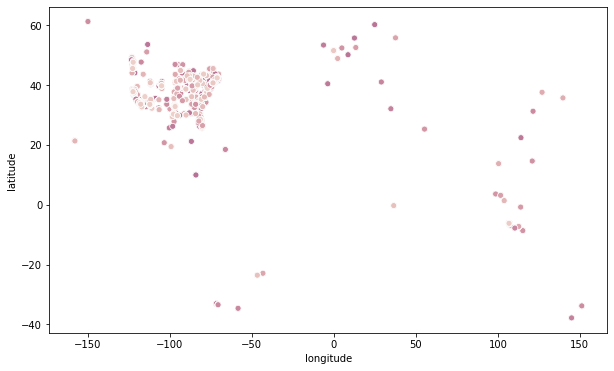

In [167]:
f, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=top_data.longitude, y=top_data.latitude, hue=top_data.cluster, legend=None)

## Центры кластеров


In [176]:
centers = ms.cluster_centers_[top_data.cluster.unique()]
centers

array([[  38.88616522,  -77.04878333],
       [  33.76663623,  -84.39328918],
       [  45.52348321, -122.67628042],
       ...,
       [  50.1115118 ,    8.6805059 ],
       [  42.0166667 ,  -94.3766667 ],
       [  37.2046429 ,  -80.4126892 ]])

In [189]:
centers.dtype

dtype('float64')

## Поиск ближайшего центра 

In [193]:
office_names = ["Los Angeles", "Miami", "London", "Amsterdam", "Beijing", "Svdnev"]
offices = np.array(
[[33.751277, -118.188740],
[25.867736, -80.324116],
[51.503016, -0.075479],
[52.378894, 4.885084],
[39.366487, 117.036146],
[-33.868457, 151.205134]], dtype=np.float64)

In [225]:
import scipy

In [229]:
min_d = 10e10
min_center = None
for office in offices:
    for center in centers:
        d = scipy.spatial.distance.euclidean(office, center)
        if d < min_d:
            min_d = d
            min_center = center

In [230]:
min_center

array([-33.86063043, 151.20477593])

In [231]:
!echo "-33.86063043 151.20477593" >> "data/task1_out.txt"